# Data Exploration

In this notebook, we will explore the dataset provided for training the phoneme-based TTS model. We will visualize audio samples and understand the phoneme structure.

In [3]:
# Import necessary libraries
import pandas as pd
import os
import librosa
import matplotlib.pyplot as plt
import numpy as np

# Set the path for the metadata file
metadata_path = '../data/metadata.csv'

# First, check the file format
with open(metadata_path, 'r') as f:
    first_line = f.readline().strip()
    print(f"First line of metadata: {first_line}")

# Load the metadata properly
# Based on the observed format, we need to parse it correctly
metadata = pd.read_csv(metadata_path, header=0, names=['wav_filename', 'transcript'])
print(metadata.head())

First line of metadata: wav_file,transcript
                               wav_filename  \
0  13b2068a-2def-4f69-b4ba-168c4da30498.wav   
1  f3429b2a-fcb2-4073-b17b-0529840bda6c.wav   
2  7086ebc0-3f6d-4947-ab2b-0b9289a42978.wav   
3  97311a8e-52a5-4b9e-be46-3ba6a29c39aa.wav   
4  81827e62-9599-4b47-8b1d-092e58677b34.wav   

                                          transcript  
0  I invite you to embark on a profound journey a...  
1  Meditation on the White Light This technique i...  
2  Meditation on the White Light This technique i...  
3  Meditation on the White Light This technique i...  
4  positive affirmations for me My business is co...  


In [4]:
# Fix any issues with the columns if needed
if 'wav_file,transcript' in metadata.columns:
    # If the CSV wasn't properly split, split it manually
    metadata = pd.DataFrame(metadata['wav_file,transcript'].str.split(',', n=1).tolist(),
                        columns=['wav_filename', 'transcript'])

# Display the first few rows to confirm format
metadata.head()

,wav_filename,transcript
0,13b2068a-2def-4f69-b4ba-168c4da30498.wav,I invite you to embark on a profound journey a...
1,f3429b2a-fcb2-4073-b17b-0529840bda6c.wav,Meditation on the White Light This technique i...
2,7086ebc0-3f6d-4947-ab2b-0b9289a42978.wav,Meditation on the White Light This technique i...
3,97311a8e-52a5-4b9e-be46-3ba6a29c39aa.wav,Meditation on the White Light This technique i...
4,81827e62-9599-4b47-8b1d-092e58677b34.wav,positive affirmations for me My business is co...


## Audio Sample Visualization

Let's visualize some audio samples from the dataset.

Audio directory found: ../data/audio/
Sample files in audio directory: ['.gitkeep', '007b4f2d-e768-4307-b8e4-ccd04c5717a8.wav', '0134ba99-ee64-4c48-a612-d395c7b77969.wav', '0145bf86-80b8-4e44-813f-ebe15d36ecab.wav', '0148b51b-6829-4215-bdd1-c86a5659a2af.wav']
Visualizing file: 13b2068a-2def-4f69-b4ba-168c4da30498.wav
Transcript: I invite you to embark on a profound journey a journey of healing, self discovery, and emotional ren...


c:\Users\itzmo\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
c:\Users\itzmo\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
c:\Users\itzmo\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


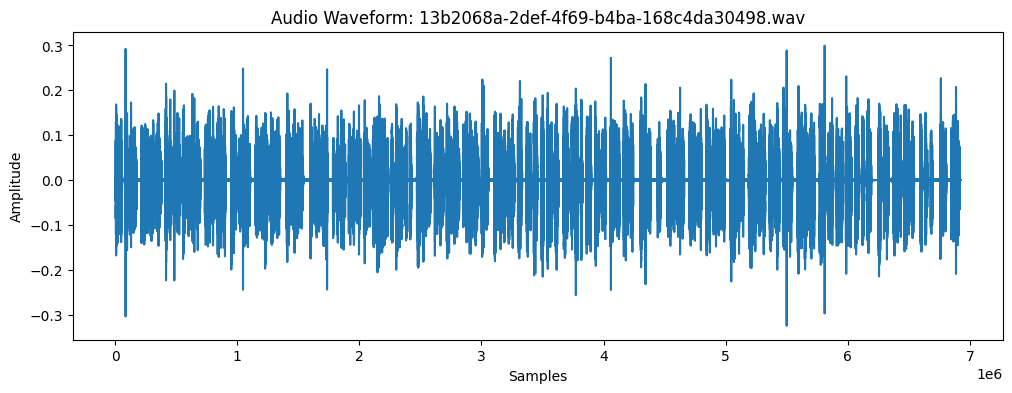

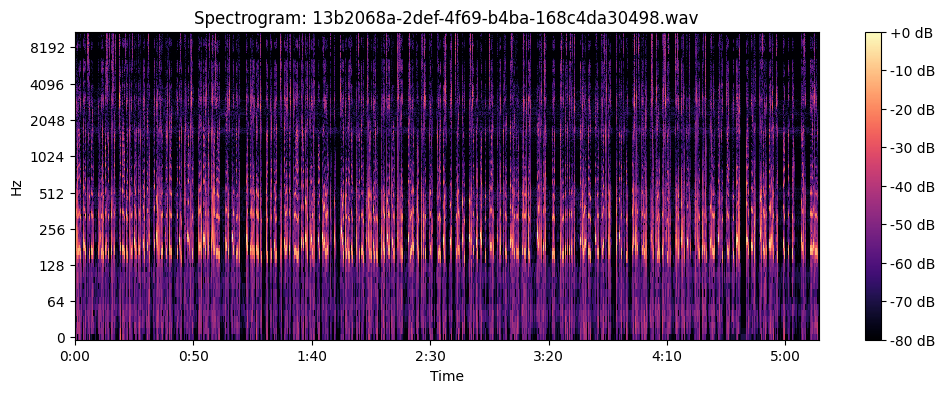

Visualizing file: f3429b2a-fcb2-4073-b17b-0529840bda6c.wav
Transcript: Meditation on the White Light This technique is divided into two parts, the first dealing with gener...


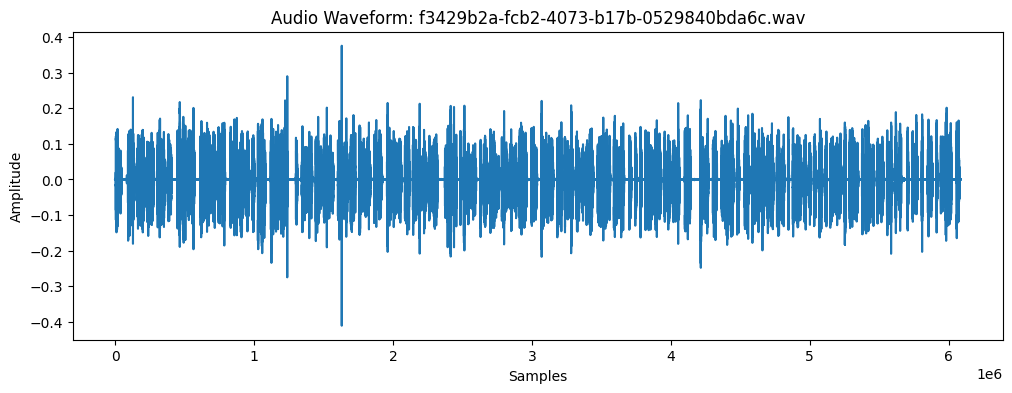

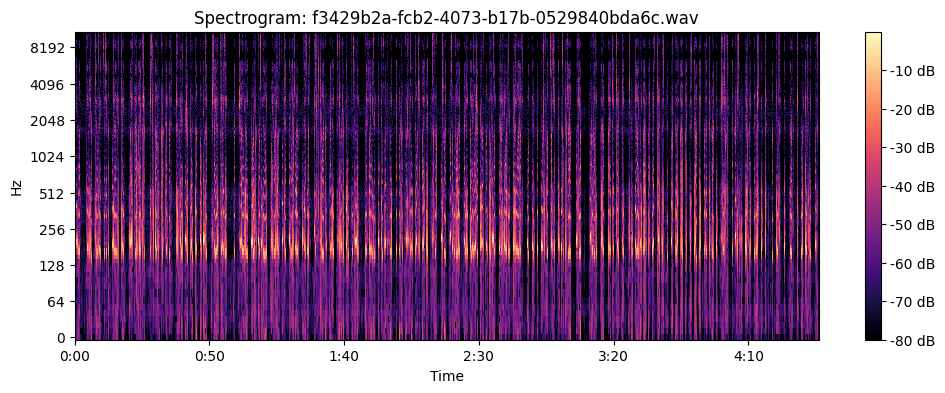

Visualizing file: 7086ebc0-3f6d-4947-ab2b-0b9289a42978.wav
Transcript: Meditation on the White Light This technique is divided into two parts, the first dealing with gener...


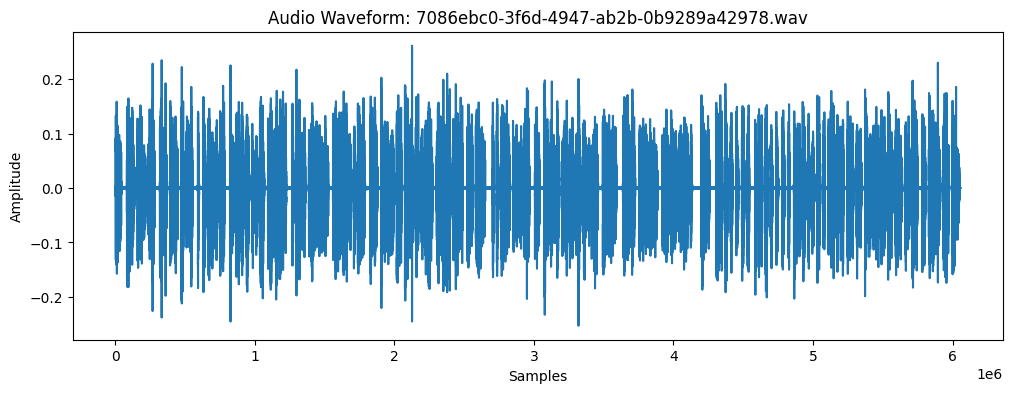

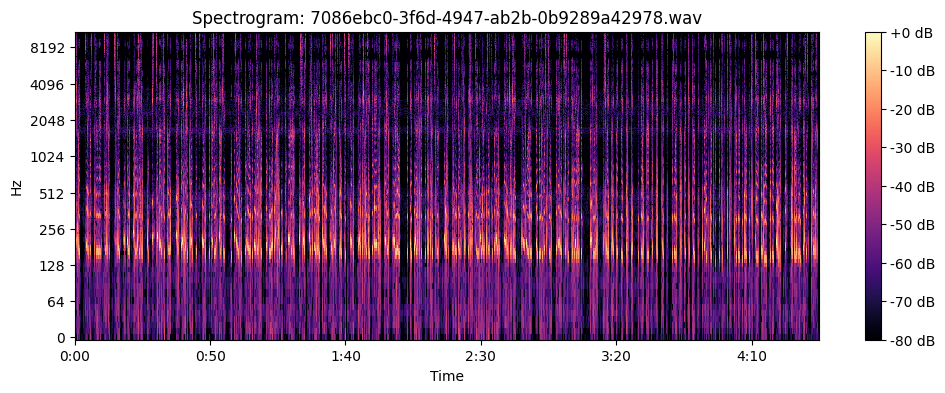

In [5]:
# Function to load and plot audio
def plot_audio(file_path):
    try:
        audio, sr = librosa.load(file_path)
        plt.figure(figsize=(12, 4))
        plt.plot(audio)
        plt.title(f'Audio Waveform: {os.path.basename(file_path)}')
        plt.xlabel('Samples')
        plt.ylabel('Amplitude')
        plt.show()
        
        # Also show spectrogram
        D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
        plt.figure(figsize=(12, 4))
        librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'Spectrogram: {os.path.basename(file_path)}')
        plt.show()
        return True
    except Exception as e:
        print(f"Error loading audio file {file_path}: {e}")
        return False

# Make sure the audio directory exists
audio_dir = '../data/audio/'
if not os.path.exists(audio_dir):
    print(f"Warning: Audio directory {audio_dir} does not exist!")
else:
    print(f"Audio directory found: {audio_dir}")
    # List available files
    files = os.listdir(audio_dir)[:5]  # Show first 5 files
    print(f"Sample files in audio directory: {files}")

# Visualize the first 3 audio samples
successful_visualizations = 0
for index, row in metadata.iterrows():
    if successful_visualizations >= 3:
        break
        
    # Use the correct column name for audio filenames
    audio_filename = row['wav_filename']
    audio_file = os.path.join(audio_dir, audio_filename)
    
    if os.path.exists(audio_file):
        print(f"Visualizing file: {audio_filename}")
        print(f"Transcript: {row['transcript'][:100]}...")
        if plot_audio(audio_file):
            successful_visualizations += 1
    else:
        print(f"File not found: {audio_file}")

## Phoneme Structure

Next, we will analyze the transcript structure in the dataset.

Average transcript length: 311.27 characters
Min transcript length: 11 characters
Max transcript length: 3759 characters


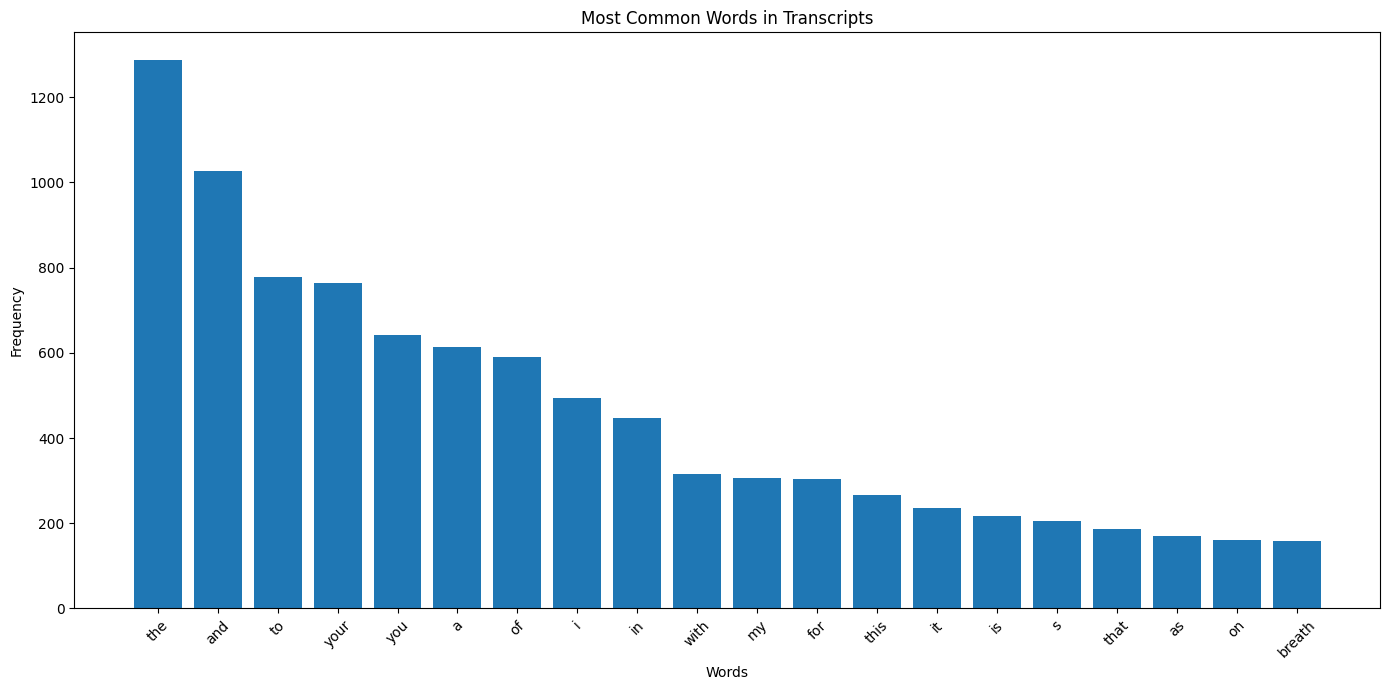

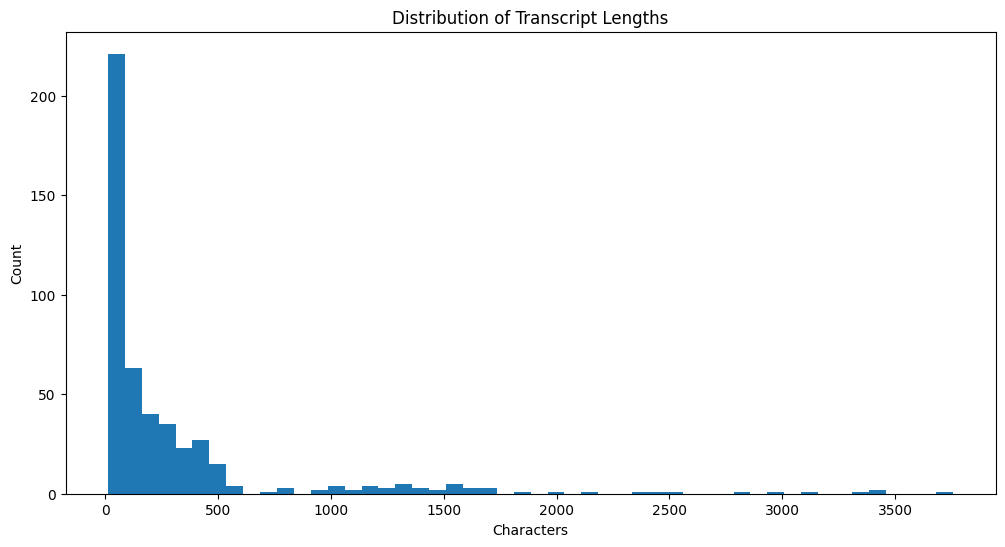

In [6]:
# Basic stats about transcripts
transcript_lengths = metadata['transcript'].str.len()
print(f"Average transcript length: {transcript_lengths.mean():.2f} characters")
print(f"Min transcript length: {transcript_lengths.min()} characters")
print(f"Max transcript length: {transcript_lengths.max()} characters")

# Clean and tokenize transcripts
import re
from collections import Counter

def clean_text(text):
    if isinstance(text, str):
        # Remove quotes, special chars, etc
        return re.sub(r'[^\w\s]', ' ', text).lower()
    return ""

# Extract words from the metadata
all_words = []
for text in metadata['transcript'].apply(clean_text):
    words = text.split()
    all_words.extend(words)

word_counts = Counter(all_words)
most_common_words = word_counts.most_common(20)

# Plot word frequency
plt.figure(figsize=(14, 7))
words, counts = zip(*most_common_words)
plt.bar(words, counts)
plt.title('Most Common Words in Transcripts')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Distribution of transcript lengths
plt.figure(figsize=(12, 6))
plt.hist(transcript_lengths, bins=50)
plt.title('Distribution of Transcript Lengths')
plt.xlabel('Characters')
plt.ylabel('Count')
plt.show()

## Audio File Analysis

Let's analyze the audio files themselves to better understand our dataset.

Analyzing 10 audio files...

Audio statistics:
         duration  sample_rate  zero_crossing_rate        rms
count   10.000000         10.0           10.000000  10.000000
mean   248.805878      22050.0            0.145861   0.018952
std     38.958225          0.0            0.006289   0.001132
min    200.855510      22050.0            0.136966   0.017255
25%    208.528980      22050.0            0.141734   0.018353
50%    258.560000      22050.0            0.144834   0.019078
75%    274.690612      22050.0            0.150628   0.019555
max    314.017959      22050.0            0.155702   0.021080

Audio statistics:
         duration  sample_rate  zero_crossing_rate        rms
count   10.000000         10.0           10.000000  10.000000
mean   248.805878      22050.0            0.145861   0.018952
std     38.958225          0.0            0.006289   0.001132
min    200.855510      22050.0            0.136966   0.017255
25%    208.528980      22050.0            0.141734   0.018353
50% 

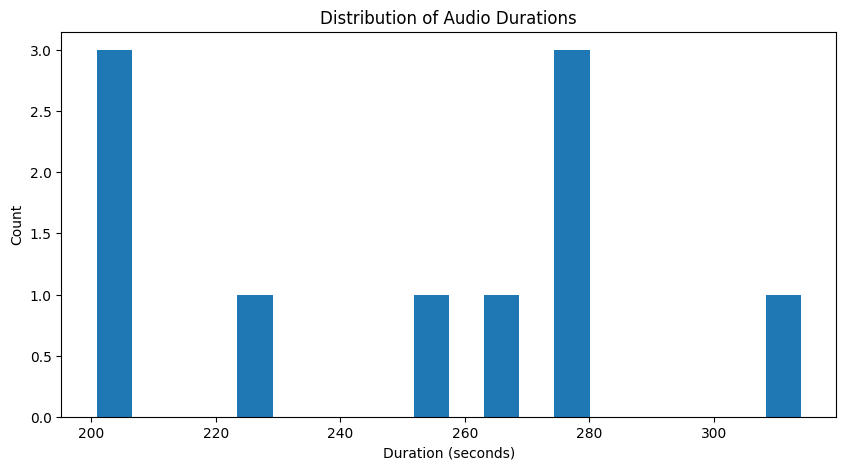

In [7]:
# Function to extract audio features
def extract_audio_features(file_path):
    try:
        audio, sr = librosa.load(file_path)
        duration = librosa.get_duration(y=audio, sr=sr)
        tempo, _ = librosa.beat.beat_track(y=audio, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(audio)[0].mean()
        rms = librosa.feature.rms(y=audio)[0].mean()
        return {
            'duration': duration,  # seconds
            'sample_rate': sr,
            'tempo': tempo,
            'zero_crossing_rate': zcr,
            'rms': rms
        }
    except Exception as e:
        print(f"Error extracting features from {file_path}: {e}")
        return None

# Analyze a sample of audio files
sample_size = min(10, len(metadata))
audio_features = []

print(f"Analyzing {sample_size} audio files...")
for index, row in metadata.head(sample_size).iterrows():
    audio_file = os.path.join(audio_dir, row['wav_filename'])
    if os.path.exists(audio_file):
        features = extract_audio_features(audio_file)
        if features:
            features['filename'] = row['wav_filename']
            audio_features.append(features)

# Convert to DataFrame for analysis
if audio_features:
    audio_df = pd.DataFrame(audio_features)
    print("\nAudio statistics:")
    print(audio_df.describe())
    
    # Plot duration distribution
    plt.figure(figsize=(10, 5))
    plt.hist(audio_df['duration'], bins=20)
    plt.title('Distribution of Audio Durations')
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Count')
    plt.show()
else:
    print("No audio features could be extracted.")

## Conclusion

In this notebook, we explored the dataset by visualizing audio samples and analyzing the transcript structure. Key findings:

1. The dataset contains audio files with their corresponding transcripts
2. We've analyzed the audio properties including duration, tempo, and amplitude characteristics
3. We've examined the distribution of transcript lengths and common words

This understanding will help us in the subsequent steps of training the phoneme-based TTS model. Next steps would include:

- Converting the transcripts to phoneme sequences
- Extracting mel-spectrograms from audio for model training
- Setting up the model architecture based on our dataset characteristics